In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/franciscorossi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [22]:
results = pd.read_csv("datasets/results_transformed.csv", sep=";")
partys = list(results.columns[7:])

In [3]:
results.shape

(316, 13)

In [4]:
results = results.rename(columns={'Gebiet':'Area','gehört zu': 'belongs to', \
                        'Wahlberechtigte': 'Eligible voters', 'Wähler':'Voters', \
                       'Ungültige': 'Invalid', 'Gültige': 'Valid',})

# Number of ID (Nr)
Repeated_IDs = len(results['Nr']) - len(results['Nr'].unique())
print(f"There are %d rows repeated"%(Repeated_IDs))


# We have, states with code 99, also all germany, we will split on one side the states.
# and in the other side only areas.
results_states = results[results['belongs to']==99].sort_values(by=['Nr'])
results_states.drop("belongs to", axis=1, inplace = True)
results_states.rename(columns={"Area" : "state"}, inplace=True)
results_states

There are 17 rows repeated


,Nr,state,Eligible voters,Voters,Invalid,Valid,Christlich Demokratische Union Deutschlands,Sozialdemokratische Partei Deutschlands,DIE LINKE,BÜNDNIS 90/DIE GRÜNEN,Freie Demokratische Partei,Alternative für Deutschland
11,1,Schleswig-Holstein,2266012,1729194,13553,1715641,583135,399505,124678,205471,216844,140362
25,2,Hamburg,1296656,984926,6808,978118,266312,229862,119076,136371,105610,76511
56,3,Niedersachsen,6124582,4681871,34895,4646976,1623481,1275172,322979,404825,431405,422362
59,4,Bremen,474151,335919,3596,332323,83409,88944,44629,36733,31056,33244
158,5,Nordrhein-Westfalen,13174577,9938461,85084,9853377,3214013,2557876,736904,744970,1293052,928425
198,6,Hessen,4408986,3395441,46541,3348900,1033200,788427,271158,323736,386742,398712
223,7,Rheinland-Pfalz,3080591,2392093,29587,2362506,848003,570518,160912,179233,245235,265688
309,8,Baden-Württemberg,7732597,6053943,60975,5992968,2061687,982370,380727,807205,762008,730499
270,9,Bayern,9522371,7441006,47796,7393210,2869688,1130931,450803,722116,751248,916300
314,10,Saarland,777264,595411,10153,585258,189573,158895,75448,35117,44477,58920


In [5]:
results_country = pd.DataFrame(data= results_states.sum()).T
results_country.drop('Nr', axis=1, inplace=True)
results_country["state"] = "Germany"
results_country

,state,Eligible voters,Voters,Invalid,Valid,Christlich Demokratische Union Deutschlands,Sozialdemokratische Partei Deutschlands,DIE LINKE,BÜNDNIS 90/DIE GRÜNEN,Freie Demokratische Partei,Alternative für Deutschland
0,Germany,61688485,46976341,460849,46515492,15317344,9539381,4297270,4158400,4999449,5878115


In [6]:
results_areas = results[results['belongs to'] != 99].sort_values(by=['Nr'])
results_areas = results_areas[results_areas['Area'] != 'Bundesgebiet']
results_areas.shape

(299, 13)

In [35]:
feautures = pd.read_csv("datasets/features_transformed.csv", sep=";", decimal=',')
col2replace = list(feautures.select_dtypes(exclude=['float64', 'int64']).columns)
col2replace.remove('state')
feautures[col2replace] = feautures[col2replace].replace(".", 0)
feautures[col2replace] = feautures[col2replace].apply(lambda x: pd.to_numeric(x.str.replace(",",".")))

In [43]:
X_names = list(feautures.columns)
X_names.remove('state')
X_names.remove('constituency number')
X_names

['municipalities',
 'area in km2',
 'population - total (in thousands)',
 'population - germans (in thousands)',
 'population - foreigners (%)',
 'population density (inhabitants per km^2)',
 'increase or decrease in population due to birth/death (per 1000 inhabitants)',
 'increase or decrease in population due to migration (per 1000 inhabitants)',
 'aged under 18 (%)',
 'aged 18 to 24 (%)',
 ' aged 25 to 34 (%)',
 'aged 35 to 59 (%)',
 'aged 60 to 74 (%)',
 'aged 75 an older (%)',
 'inhibitants without a migration background (%)',
 'inhibitants with a migration background (%)',
 'religion - roman catholic (%)',
 'religion - evangelical (%)',
 'religion - other, none, not specified (%)',
 'real estate ownership rate (%)',
 'completed apartments in 2014 (per 1000 inhbitants)',
 'Stock of apartments (per 1000 inhabitants)',
 'available income for private household � (per inhabitant)',
 'gdp per capita in �',
 'Motor vehicles (per 1000 inhabitants)',
 'graduates of vocational schools',
 '

In [8]:
feautures_states = feautures[feautures['constituency number'] > 900]
feautures_states = feautures_states [feautures['constituency number'] < 999]
print(feautures_states.shape)

feautures_country = feautures[feautures['constituency number'] == 999]

(16, 50)


<ipython-input-8-6003a8f04d23>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feautures_states = feautures_states [feautures['constituency number'] < 999]


In [9]:
feautures_areas = feautures[feautures['constituency number'] <= 900]
feautures_areas.shape

(299, 50)

In [10]:
display(results_areas[['Nr', 'belongs to', 'Area']])
feautures_areas[['constituency number', 'state']]

,Nr,belongs to,Area
0,1,1.0,Flensburg – Schleswig
1,2,1.0,Nordfriesland – Dithmarschen Nord
2,3,1.0,Steinburg – Dithmarschen Süd
3,4,1.0,Rendsburg-Eckernförde
4,5,1.0,Kiel
...,...,...,...
308,295,8.0,Zollernalb – Sigmaringen
310,296,10.0,Saarbrücken
311,297,10.0,Saarlouis
312,298,10.0,St. Wendel


,constituency number,state
0,1,Schleswig-Holstein
1,2,Schleswig-Holstein
2,3,Schleswig-Holstein
3,4,Schleswig-Holstein
4,5,Schleswig-Holstein
...,...,...
308,295,Baden-W�rttemberg
310,296,Saarland
311,297,Saarland
312,298,Saarland


In [27]:
# Merge of both the results and the feautures dataframes
df_areas = results_areas.merge(feautures_areas, left_on='Nr',right_on='constituency number')
# Checking if all columns are there
df_areas.shape[1] == feautures_areas.shape[1] + results_areas.shape[1]
df_areas.shape

(299, 63)

<AxesSubplot:>

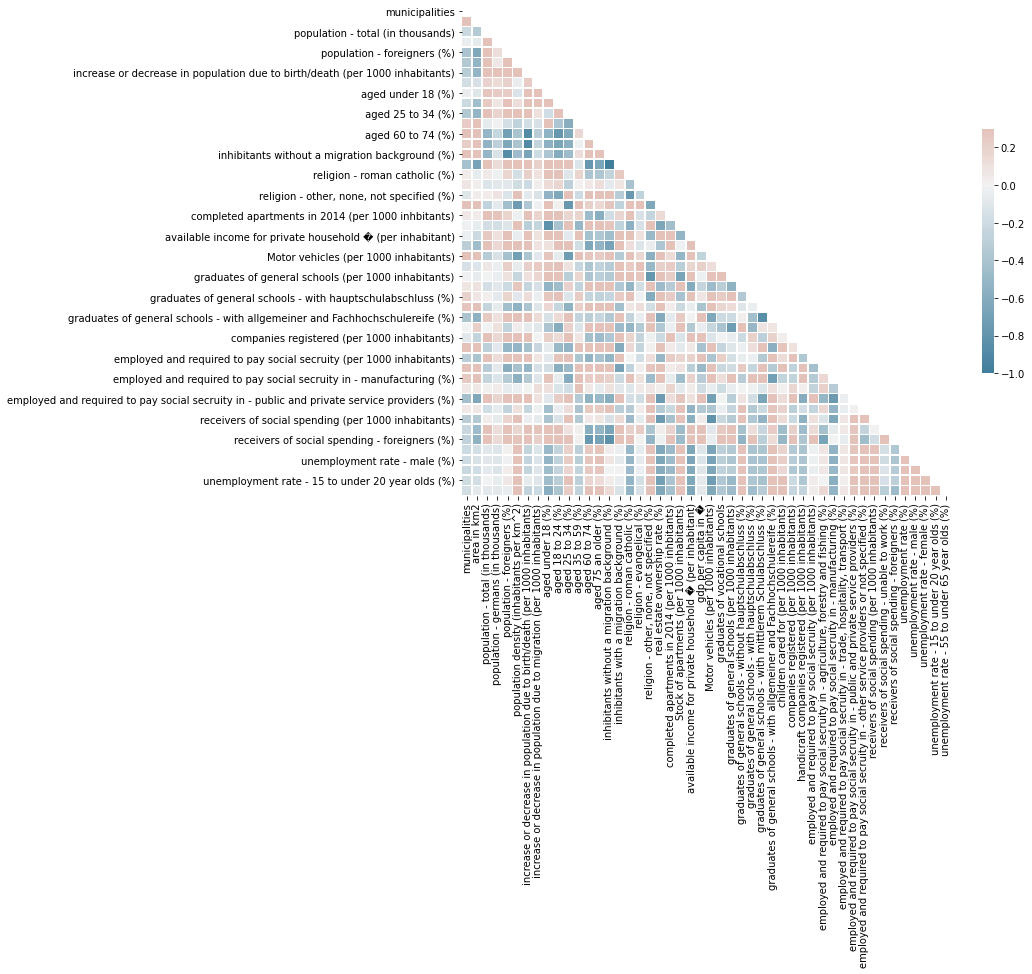

In [44]:
# Compute the correlation matrix
corr = df_areas[X_names].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
corr.shape

(61, 61)